<a href="https://colab.research.google.com/github/AlmalkiHub/insurance_cost_prediction/blob/main/insurance_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Ali Almalki`
# Medical Insurance Cost Prediction Project 
## Predicitng Medical Insurance Cost based on feature variables.💵

**`Dataset Source: `**

[Medical Cost Personal Datasets Insurance Forecast by using Linear Regression](https://www.kaggle.com/mirichoi0218/insurance)


# End-to-end neural network regression predictive modelling with TensorFlow

This notebook builds an end-to-end regressor using TensorFlow library.

## 1. Problem Definition

Predicting the medical insurance charges for a person given other feature variables. 


## 2. Dataset 


You can find the data through this link:
https://www.kaggle.com/mirichoi0218/insurance


## 3. Features

**Dataset information:**

We have the following columns: 

- **age**: age of primary beneficiary

- **sex**: insurance contractor gender, female, male

- **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- **children**: Number of children covered by health insurance / Number of dependents

- **smoker**: Smoking

- **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- **charge**: Individual medical costs billed by health insurance

#### Import all required libraries for the project

In [163]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#### Read the data into a dataframe

In [164]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [165]:
# Check for null values in the dataset 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [166]:
# Check columns types in the dataset 
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [167]:
# General info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [168]:
# How many rows and columns in the dataset? 
df.shape

(1338, 7)

In [169]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Since we have some categorical features, we need to turn these categorical values into numbers

In [170]:
# One-hot encode the dataset
df = pd.get_dummies(df)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


#### Turn the data into features and label 

In [171]:
# X features and y label 
X = df.drop(columns=['charges'], axis=1)
y = df['charges']

X.shape, y.shape

((1338, 11), (1338,))

In [172]:
# View X features 
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [173]:
# View y label 
pd.DataFrame(y)

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


#### Split the dataset into training and test sets

In [174]:
# Create training and test sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

len(xtrain), len(xtest), len(ytrain), len(ytest)

(1070, 268, 1070, 268)

In [175]:
# Check the sets length are correct
print(len(X) == len(xtrain) + len(xtest))
print(len(y) == len(ytrain) + len(ytest))

True
True


#### Build a regression neural network model (Baseline Model)

In [176]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10), # Input layer with 10 units (input features)
    tf.keras.layers.Dense(1)   # Output layers with 1 unit (label)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model 
model.fit(xtrain, ytrain, epochs=100)


Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1743 - mae: 7493.1743

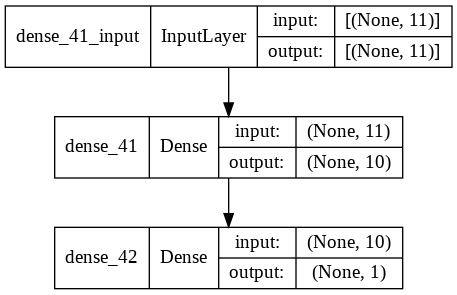

In [177]:
# Plot model information
plot_model(model, show_shapes=True)

In [178]:
# Model summary information
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 10)                120       
                                                                 
 dense_42 (Dense)            (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [179]:
# Evaluate the model performance
model.evaluate(xtest, ytest)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [180]:
# Check the median and mean value of y label value to check with MAE metric result
print(model.evaluate(xtest, ytest))
print(ytrain.mean())
print(ytrain.median())

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291
[7023.3291015625, 7023.3291015625]
13346.089736364489
9575.4421


In [181]:
# Model predictions
ypred = model.predict(xtest)
ypred

array([[12541.166 ],
       [ 8981.749 ],
       [20281.945 ],
       [12997.792 ],
       [ 7667.256 ],
       [ 9048.03  ],
       [ 3970.31  ],
       [16986.562 ],
       [ 6553.7   ],
       [13931.824 ],
       [11841.377 ],
       [11257.752 ],
       [ 7640.4194],
       [17186.02  ],
       [19633.303 ],
       [16880.6   ],
       [14148.9795],
       [16439.781 ],
       [12374.691 ],
       [14375.43  ],
       [ 7863.217 ],
       [11745.962 ],
       [ 3963.8625],
       [ 5556.0513],
       [14307.78  ],
       [14338.122 ],
       [15751.809 ],
       [ 7908.605 ],
       [13147.357 ],
       [ 3969.0344],
       [11877.595 ],
       [14943.573 ],
       [ 5069.9224],
       [ 8432.175 ],
       [ 6402.6353],
       [11912.932 ],
       [ 4998.167 ],
       [11293.194 ],
       [17304.564 ],
       [13189.915 ],
       [ 6431.8228],
       [ 5454.861 ],
       [15130.4   ],
       [15198.897 ],
       [ 9324.264 ],
       [15607.694 ],
       [ 5837.816 ],
       [ 7023

In [182]:
# Check ground truth labels
ytest

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

#### So far it looks like our model is not performing too well. Let's try and improve it🛠

### Running some experiemnts to improve our model
Generally to improve a neural network model we can do one of the following: 
- Adding more layers.
- Increase the number of hidden units.
- Set/change the activation function. 
- Set/change the optimisation function. 
- Set/change the learning rate of the optimiser. 
- Fitting on more data.
- Fitting for longer (Increase the number of epochs)

Let's do 4 modelling experiments and compare their results:

- `model_1` - Add an extra layer with more hidden units and use Adam optimiser function.
- `model_2` - Train for longer (300 epochs).
- `model_3` - Change the learning rate of Adam optimiser function.
- `model_4` - Normalise the feature variables and feed it to the neural network.

#### `model_1`

In [183]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# Add an extra layer and increase number of units
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # Extra layer with 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (output layer)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),  
                          metrics=['mae'])

# Fit the model and save the history to plot it later
history = model_1.fit(xtrain, ytrain, epochs=100)


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7409.0811 - mae:

In [184]:
# Evaluate models performance
print(model.evaluate(xtest, ytest)) # Baseline model 
print(model_1.evaluate(xtest, ytest)) # First experiment


9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291
[7023.3291015625, 7023.3291015625]
9/9 [==============================] - 0s 3ms/step - loss: 4924.3477 - mae: 4924.3477
[4924.34765625, 4924.34765625]


#### `model_2`

In [185]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1) 
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),  
                          metrics=['mae'])

# Fit the model 
history = model_2.fit(xtrain, ytrain, epochs=300)

Epoch 1/300
34/34 [==============================] - 1s 3ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [186]:
# Evaluate models performance
print('Baseline Model performance: ', model.evaluate(xtest, ytest)) # Baseline model 
print('First Experiment Model performance: ', model_1.evaluate(xtest, ytest)) # First experiment
print('Second Experiment Model performance: ', model_2.evaluate(xtest, ytest)) # Second experiment

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291
Baseline Model performance:  [7023.3291015625, 7023.3291015625]
9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477
First Experiment Model performance:  [4924.34765625, 4924.34765625]
9/9 [==============================] - 0s 2ms/step - loss: 3215.8608 - mae: 3215.8608
Second Experiment Model performance:  [3215.86083984375, 3215.86083984375]


#### `model_3`

In [187]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1) 
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(lr=0.0001),  
                          metrics=['mae'])

# Fit the model 
history = model_3.fit(xtrain, ytrain, epochs=300)

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - 1s 2ms/step - loss: 13321.3848 - mae: 13321.3848
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 13311.0273 - mae: 13311.0273
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 13300.1748 - mae: 13300.1748
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 13288.6494 - mae: 13288.6494
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 13276.3418 - mae: 13276.3418
Epoch 6/300
34/34 [==============================] - 0s 3ms/step - loss: 13262.9990 - mae: 13262.9990
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 13248.5332 - mae: 13248.5332
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 13232.7246 - mae: 13232.7246
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - loss: 13215.3711 - mae: 13215.3711
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 13196.3799 - mae: 13

In [188]:
# Evaluate models performance
print('Baseline Model performance: ', model.evaluate(xtest, ytest)) # Baseline model 
print('First Experiment Model performance: ', model_1.evaluate(xtest, ytest)) # First experiment
print('Second Experiment Model performance: ', model_2.evaluate(xtest, ytest)) # Second experiment
print('Third Experiment Model performance: ', model_3.evaluate(xtest, ytest)) # Third experiment

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291
Baseline Model performance:  [7023.3291015625, 7023.3291015625]
9/9 [==============================] - 0s 3ms/step - loss: 4924.3477 - mae: 4924.3477
First Experiment Model performance:  [4924.34765625, 4924.34765625]
9/9 [==============================] - 0s 3ms/step - loss: 3215.8608 - mae: 3215.8608
Second Experiment Model performance:  [3215.86083984375, 3215.86083984375]
9/9 [==============================] - 0s 2ms/step - loss: 6922.0190 - mae: 6922.0190
Third Experiment Model performance:  [6922.01904296875, 6922.01904296875]


#### Plot the loss curve/training curve

In [189]:
history

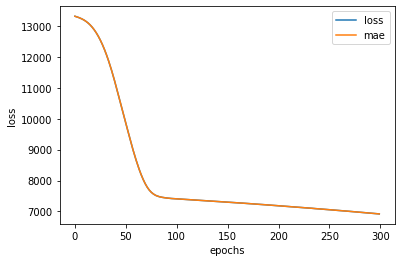

In [190]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs');

##### When we train our neural network we want our loss curve down because that means that our model predictions are becoming less and less wrong.

#### Normalise feature variables

In [191]:
# Create column transformer 
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # make all values between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

In [192]:
# Read the data again to normalise the feature variables
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [193]:
# Create X features & y label
X = df.drop(columns=['charges'], axis=1)
y = df['charges']

In [194]:
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)


In [195]:
# Check sets length to make sure they're equal
len(xtrain), len(ytrain), len(xtest), len(ytest)

(1070, 1070, 268, 268)

In [196]:
# Check the Column Transformer
ct

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [197]:
# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(xtrain)


ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [198]:
# Transform training and test set to normalise feature variables
x_train_normal = ct.transform(xtrain)
x_test_normal = ct.transform(xtest)

In [199]:
# Check out our normalised trainig set
x_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [200]:
# Check out a sample of our normalised trainig set
x_train_normal[42]

array([0.36956522, 0.31584611, 0.6       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        ])

In [201]:
# Check out our normalised testing set
x_test_normal

array([[0.58695652, 0.24791499, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.39130435, 0.37826204, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.29391983, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.43478261, 0.32458972, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.7826087 , 0.84611246, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.7173913 , 0.49071832, 0.2       , ..., 0.        , 0.        ,
        1.        ]])

In [202]:
# Check out a sample of our normalised testing set
x_test_normal[42]

array([0.82608696, 0.53376379, 0.2       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        ])

In [203]:
# Compare the shape between original training set and the normalized/one-hot encoded training set
x_train_normal.shape, xtrain.shape

((1070, 11), (1070, 6))

##### From the shape comparison above we notice that the normalised training set shape is larger because of the extra features.

#### `model_4`
In this experiment we will use the same model we built in the second experiemnt `model_2` . However, the difference here is that our feature variables are normalised.

In [204]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1) 
])

# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),  
                          metrics=['mae'])

# Fit the model 
history = model_4.fit(x_train_normal, ytrain, epochs=300)

Epoch 1/300
34/34 [==============================] - 1s 3ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/300
34/34 [==============================] - 0s 3ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 11925.96

In [206]:
# Evaluate models performance

print('Fourth Experiment Model performance: ', model_4.evaluate(x_test_normal, ytest)) # Fourth experiment

9/9 [==============================] - 0s 2ms/step - loss: 3161.5601 - mae: 3161.5601
Fourth Experiment Model performance:  [3161.56005859375, 3161.56005859375]


**Experiments Results**

<center>[Loss, Mean Absolute Error (MAE)] </center>

- **`Baseline Model`**:  [7023.3291015625, 7023.3291015625]
- **`First Experiment Model`**:  [4924.34765625, 4924.34765625]
- **`Second Experiment Model`**:  [3215.86083984375, 3215.86083984375]
- **`Third Experiment Model`**:  [6922.01904296875, 6922.01904296875]
- **`Fourth Experiment Model`**:  [3161.56005859375, 3161.56005859375]


### Conclusion
From the results, we can notice that when increasing the number of layers and using the Adam optimiser function as in the first experiment **`model_1`**  yields better results than the baseline model which has only two layers with few hidden units in the neural network.


Also, we notice when we let the neural network model train for a little bit longer (more epochs) it learns the patterns in the data better as in the second experiment **`model_2`** . 

Regarding the third experiment **`model_3`** when I modified the default value of the learning rate of the Adam optimiser, the model got worse in performance.


In the final experiment **`model_4`** (best result), we can see normalising the data results in much less error using the same model in the second experiment that does not normalise the data.
This is one of the main advantages of normalisation: faster convergence meaning that the model gets to more reliable results faster.

### References: 
- Converting categorical variable into dummy/indicator variables: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
- Splitting data: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Keras Sequential model: https://www.tensorflow.org/guide/keras/sequential_model
- Normalisation and Standardisation: https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02